# Lab 1

Objective:  Learn plotting, writing functions, derivatives


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot(f, xmin, xmax, log=False, ylabel="y", xlabel="x"):
    
    if not log:

        xs = np.linspace(xmin, xmax, 100, endpoint=True)
        ys = f(xs)

        plt.xlim(xmin, xmax)
        plt.plot(xs, ys)
    else:

        xs = np.logspace(xmin, xmax, 100, endpoint=True)
        ys = f(xs)

        plt.xlim(10**xmin, 10**xmax)
        plt.loglog(xs, ys)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

## 1.  Write a python function $\sin \frac {2x}{3}$ and then plot it from 0 to $4\pi$

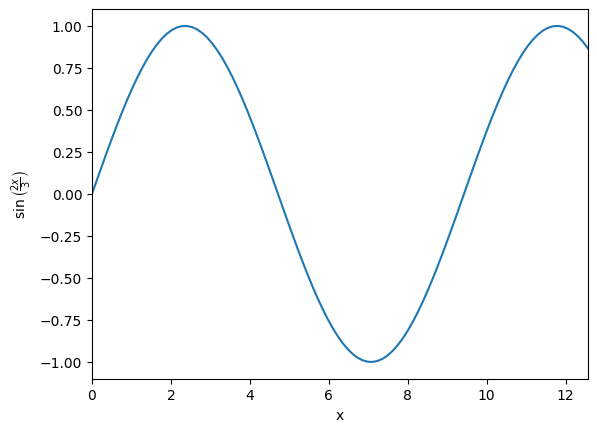

In [36]:
def f1(x):

    return np.sin(2 * x / 3)

plot(f1, 0, 4 * np.pi, ylabel="$\\sin\\left(\\frac{2x}{3}\\right)$")

## 2.  Write the python function $f(x)=3\sin^2 x -4\sin x +2$ and plot it from 0 to $\pi$.

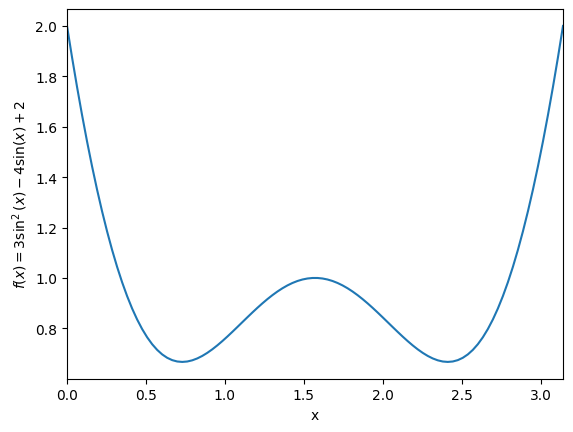

In [37]:
def f2(x):

    return 3 * np.sin(x)**2 - 4 * np.sin(x) + 2

plot(f2, 0, np.pi, ylabel="$f(x)=3\\sin^2(x)-4\\sin(x)+2$")

## 3.  Calculate and plot the derivative $f'$ using the rules from calculus (so write the analytic function and plot it).

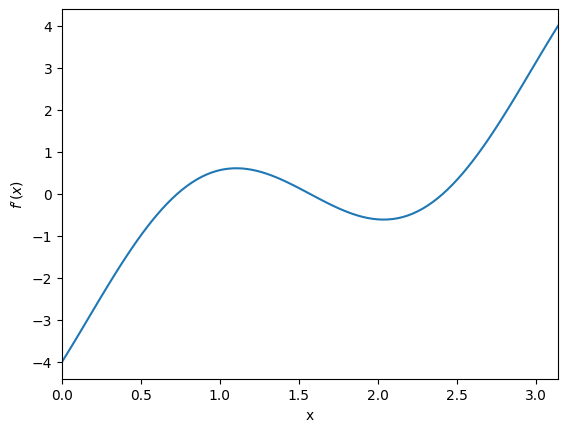

In [38]:
def f3(x):

    return 6 * np.sin(x) * np.cos(x) - 4 * np.cos(x)

plot(f3, 0, np.pi, ylabel="$f'(x)$")

## 4.  Write a function that calculates the derivative numerically using the one-sided rule: 

$$d1(x)=\frac{df}{dx}=\frac {f(x+\delta)-f(x)}{\delta}$$

Call the function d1, and make it take 3 arguments d1(x,f,delta=1e-5), where x is arraylike and contains the values where the function should be evaluated, f is an arbitrary function, and delta is the step that is used to evaluate the derivative, which defaults to 1e-5.

Plot (separately) d1(x,f,1e-5) and d1(x,f,1e-5)-f'(x) over the region from 0 to $\pi.$ 

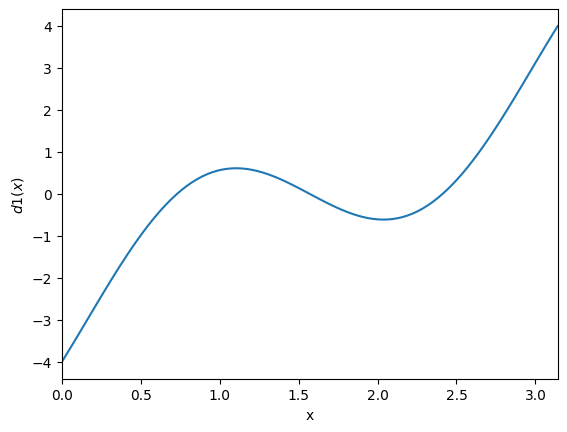

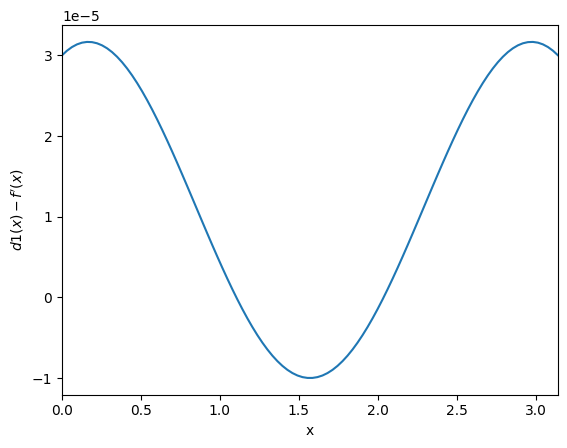

In [39]:
def d1(x, f, delta=1e-5):

    return (f(x + delta) - f(x)) / delta

plot(lambda x: d1(x, f2), 0, np.pi, ylabel="$d1(x)$")
plot(lambda x: d1(x, f2) - f3(x), 0, np.pi, ylabel="$d1(x)-f'(x)$")

## 5.  Write a second function using the symmetrical rule:  

$$d2(x)=\frac{df}{dx}=\frac {f(x+\delta)-f(x-\delta)}{2\delta}$$

Plot (separately) d2(x,f,1e-5) and d2(x,f,1e-5)-f'(x) over the region from 0 to $\pi.$ 

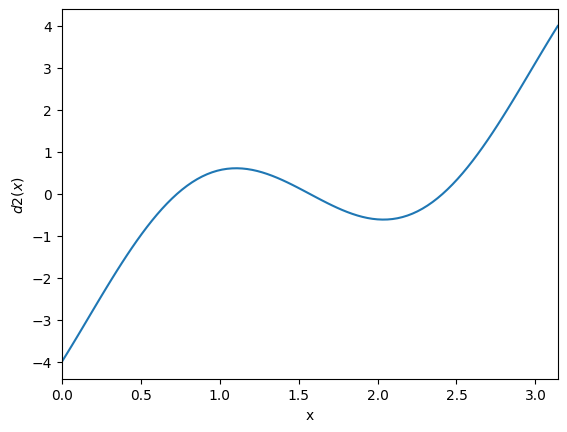

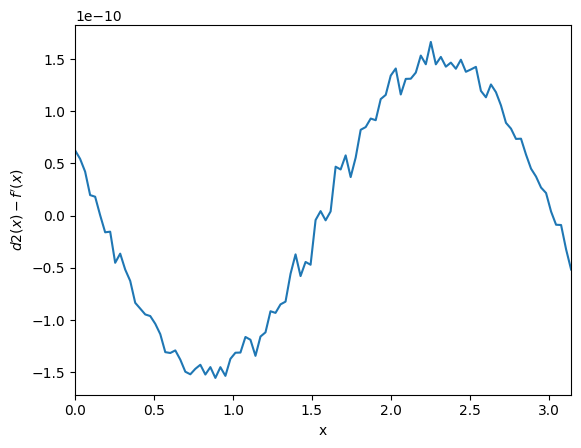

In [40]:
def d2(x, f, delta=1e-5):

    return (f(x + delta) - f(x - delta)) / (2 * delta)

plot(lambda x: d2(x, f2), 0, np.pi, ylabel="$d2(x)$")
plot(lambda x: d2(x, f2) - f3(x), 0, np.pi, ylabel="$d2(x)-f'(x)$")

## 6.  Write a function that forces the denominator to be an exactly representable number:

$x1=x+\delta$, $x2=x1-\delta$, $$d3(x)=\frac{df}{dx}=\frac {f(x1)-f(x2)}{x1-x2}$$, 

since this removes numerical inaccuracy in the x values.  

Plot (separately) d3(x,f,1e-5) and d3(x,f,1e-5)-f'(x) over the region from 0 to $\pi.$ 

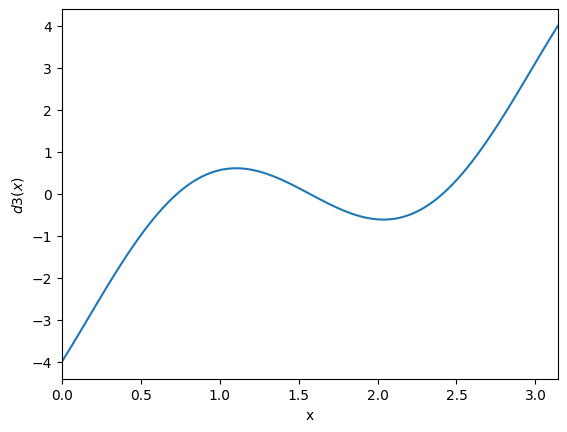

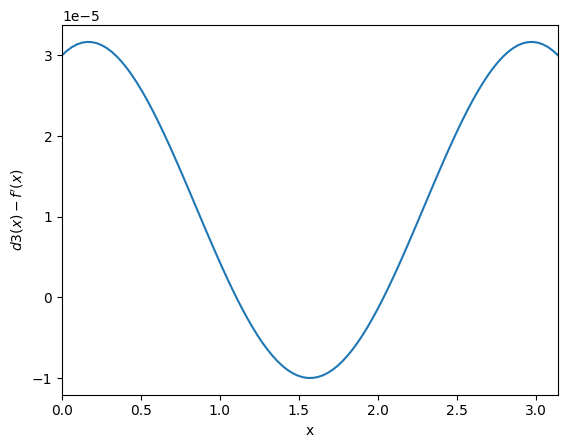

In [41]:
def d3(x, f, delta=1e-5):

    x1 = x + delta
    x2 = x1 - delta

    return (f(x1) - f(x2)) / (x1 - x2)

plot(lambda x: d3(x, f2), 0, np.pi, ylabel="$d3(x)$")
plot(lambda x: d3(x, f2) - f3(x), 0, np.pi, ylabel="$d3(x)-f'(x)$")

## 7.  Compare the performance of the three numerical integrals.

Write a function deviation(delta, derivative=d1) that calculates the RMS (root mean square) of the difference between the analytic function fprime and derivative (which can be any one of d1, d2, d3) as a function of delta.

The RMS,R, is defined by: $$R=\sqrt{\sum_{i=0}^{N-1} \frac{1}{N}\left( f'(x_i) - d(x_i,f,\delta)\right)^2}$$

$$x_i=\frac{i}{N}\pi.$$  

You can get an array, that contains all the $x_i$ conveniently with the np.linspace function.  Pick $N=100.$

Now plot, on a single log-log plot the RMS os all three derivatives versus delta, letting delta vary from 1e-12 to 1e-3.  (The np.logspace function will let you do this).  

The python "list comprehension" [f(x) for x in array] is a very handy construct, that will allow you to calculate y values for each x, which you can then plot.  

Which derivative is best?  Why do smaller delta's lead to less precise values of the integral? 

The second derivative method is best since it has the smallest minimum value of deviation.

Smaller delta leads to less precise integral values since $f(x+\delta)-f(x-\delta)$ (or whatever the derivative method uses) approaches zero, so there are less bits available to represent the difference. Less available bits leads to larger rounding errors and less precise calculations.

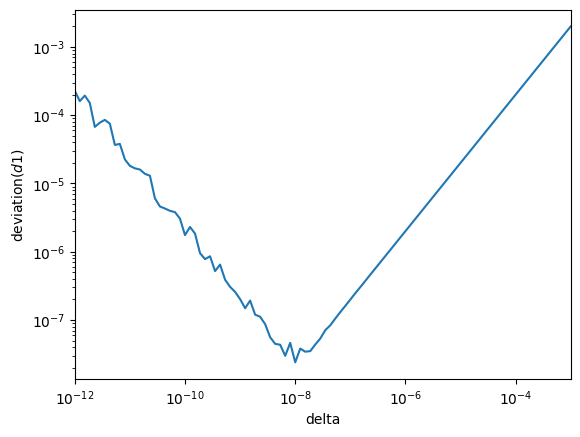

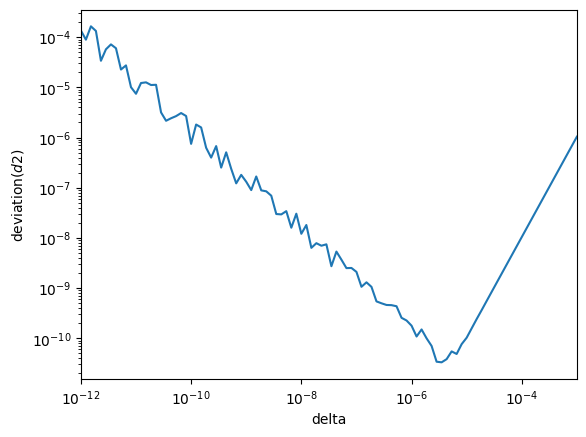

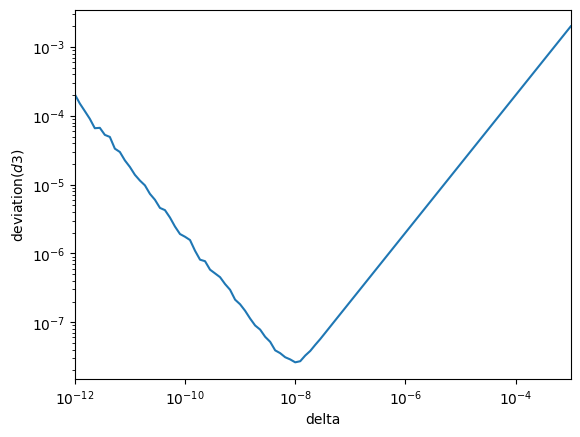

In [42]:
def deviation(delta, derivative=d1):

    N = 100

    xs = np.linspace(0, np.pi, N, endpoint=True)
    sum = 0

    for x in xs:
        sum += 1 / N * (f3(x) - derivative(x, f2, delta)) ** 2

    return np.sqrt(sum)

plot(lambda x: deviation(x, d1), -12, -3, log=True, ylabel="deviation$(d1)$", xlabel="delta")
plot(lambda x: deviation(x, d2), -12, -3, log=True, ylabel="deviation$(d2)$", xlabel="delta")
plot(lambda x: deviation(x, d3), -12, -3, log=True, ylabel="deviation$(d3)$", xlabel="delta")